In [1]:
"""
p139の式(7.1)のfeed forward networkを使ってirisを分類する
"""

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
d = load_iris()
data = d['data']
target = d['target']
train_data, test_data, train_target, test_target = train_test_split(data, target)

In [3]:
def sigmoid(x):
    x = np.clip(x, -600, np.inf)  # overflow対策
    return 1. / (1.+np.exp(-x))

def softmax(x):
    m = np.max(x)  # overflow対策
    return np.exp(x - m) / np.sum(np.exp(x - m))

In [4]:
input_size = data.shape[1]
hidden_size = 10
output_size = len(np.unique(target))
lr = 0.01
num_epochs = 150

W = np.random.randn(hidden_size, input_size)
b = np.random.randn(hidden_size)
U = np.random.randn(output_size, hidden_size)

# train
losses = []
for _ in range(num_epochs):
    epoch_loss = 0
    # online SGD
    for _ in range(len(train_data)):
        r = np.random.randint(len(train_data))
        x = train_data[r]
        target_label = train_target[r]
        t = np.zeros(output_size)
        # one-hot target vector
        t[target_label] = 1.
        
        # forward
        # 勾配計算の都合上、slpの本文中にない変数vを導入している
        v = np.dot(W, x) + b
        h = sigmoid(v)
        z = np.dot(U, h)
        y = softmax(z)
        L = -np.sum(t*np.log(y))
        epoch_loss += L
        
        # backward
        # バッチ非対応のため、ゼロから作るdeep learningの式と若干違うことに注意
        dLdz = y - t
        dLdU = np.dot(dLdz.reshape(-1, 1), h.reshape(1, -1))
        dLdh = np.dot(U.transpose(), dLdz)
        dLdv = dLdh * sigmoid(v) * (1.-sigmoid(v))
        dLdW = np.dot(dLdv.reshape(-1, 1), x.reshape(1, -1))
        dLdb = dLdv
        
        assert dLdz.shape == z.shape
        assert dLdU.shape == U.shape
        assert dLdh.shape == h.shape
        assert dLdv.shape == v.shape
        assert dLdW.shape == W.shape
        assert dLdb.shape == b.shape

        # gradient descent
        W -= lr*dLdW
        b -= lr*dLdb
        U -= lr*dLdU
    losses.append(epoch_loss)

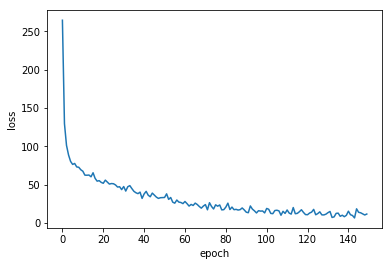

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses)

In [6]:
# predict and evaluate
from sklearn.metrics import accuracy_score
prediction = []
for x in test_data:
    v = np.dot(W, x) + b
    h = sigmoid(v)
    z = np.dot(U, h)
    y = softmax(z)
    predicted_label = np.argmax(y)
    prediction.append(predicted_label)
print(accuracy_score(test_target, prediction))

0.9210526315789473
